In [4]:
import pandas as pd

merged = pd.read_parquet(r"E:\OneDrive\Desktop\Customer Retention Analysis\data\processed\merged_data.parquet")

# Convert to datetime (if not already done)
merged['order_purchase_timestamp'] = pd.to_datetime(merged['order_purchase_timestamp'])

# Extract month of first purchase per customer
merged['cohort_month'] = merged.groupby('customer_id')['order_purchase_timestamp'].transform('min').dt.to_period('M')

# Calculate cohort index (months since first purchase)
merged['order_month'] = merged['order_purchase_timestamp'].dt.to_period('M')
merged['cohort_index'] = (merged['order_month'] - merged['cohort_month']).apply(lambda x: x.n)

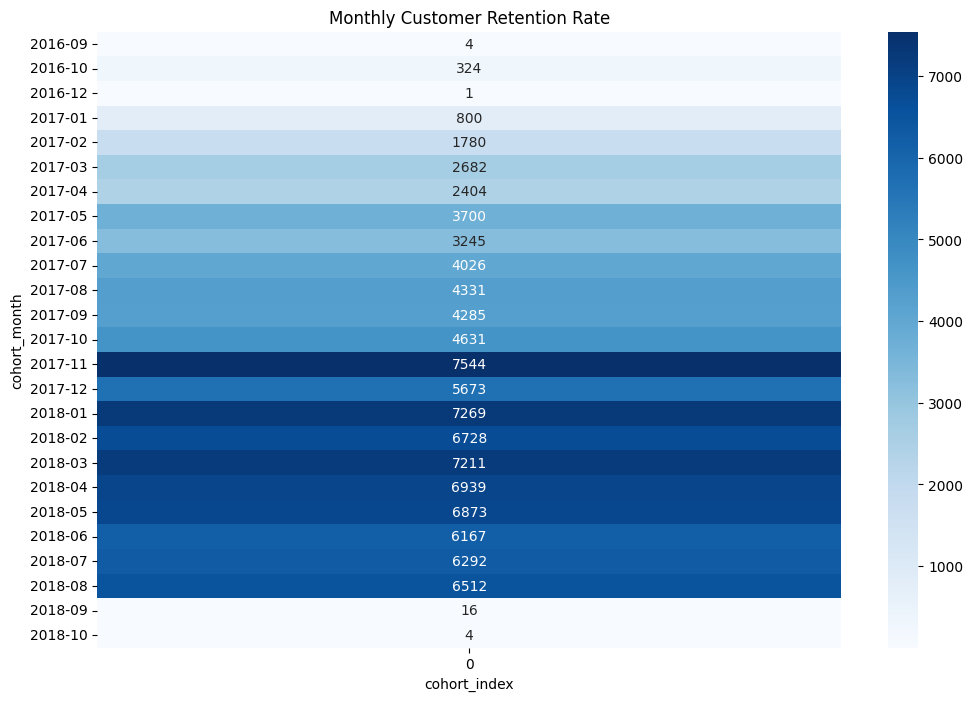

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot table for retention rates
cohort_pivot = merged.pivot_table(
    index='cohort_month',
    columns='cohort_index',
    values='customer_id',
    aggfunc='nunique'
)

# Plot
plt.figure(figsize=(12, 8))
sns.heatmap(cohort_pivot, annot=True, fmt='.0f', cmap='Blues')
plt.title('Monthly Customer Retention Rate')
plt.show()